In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/datatrooper/instatrooper/master/styles/whitetrooper.mplstyle')
dp = [
    "#1C1C3C",
    "#967B4F",
    "#46493D",
    "#839DA5",
    "#9FADAD",
    "#2B4144",
    "#986E37"
]

In [2]:
df1 = pd.read_csv("../../../data/harry-potter-dataset/Harry Potter 1.csv", sep=";")
df1["Sentence"] = df1["Sentence"].str.lower()
df1["Character"] = df1["Character"].str.strip().str.lower()


In [3]:
df2 = pd.read_csv("../../../data/harry-potter-dataset/Harry Potter 2.csv", sep=";")
df2["Sentence"] = df2["Sentence"].str.lower()
df2["Character"] = df2["Character"].str.strip().str.lower()


In [4]:
df3 = pd.read_csv("../../../data/harry-potter-dataset/Harry Potter 3.csv", sep=";").rename(columns={"CHARACTER":"Character",
                                                                                  "SENTENCE": "Sentence"})
df3["Sentence"] = df3["Sentence"].str.lower()
df3["Character"] = df3["Character"].str.strip().str.lower()

In [5]:
df_spells = pd.read_csv("../../../data/harry-potter-dataset/Spells.csv", sep=";")
df_spells["Type"] = df_spells["Type"].str.lower().str.strip()
df_spells.head()

Name       Incantation                Type  \
0                    Summoning Charm             Accio               charm   
1                           Age Line           Unknown               charm   
2                 Water-Making Spell         Aguamenti  charm, conjuration   
3   Launch an object up into the air  Alarte Ascendare               charm   
4  Albus Dumbledore's Forceful Spell           Unknown               spell   

                                              Effect     Light  
0                                  Summons an object      None  
1  Prevents people above or below a certain age f...      Blue  
2                                     Conjures water  Icy blue  
3                              Rockets target upward       Red  
4                                        Great Force      None

In [6]:
df_s = pd.DataFrame(df_spells.groupby('Type')['Name'].count()).reset_index().sort_values('Name', ascending = False)
df_s = df_s.rename(columns = {'Name':'Cuenta'}).reset_index(drop=True)
df_s = df_s.head(10)
df_s.head(10)

Type  Cuenta
0                 charm     152
1                  jinx      29
2                 curse      26
3       transfiguration      21
4                   hex      20
5                 spell      11
6           conjuration       9
7  transfiguration jinx       3
8             dark arts       3
9  healing spell, charm       3

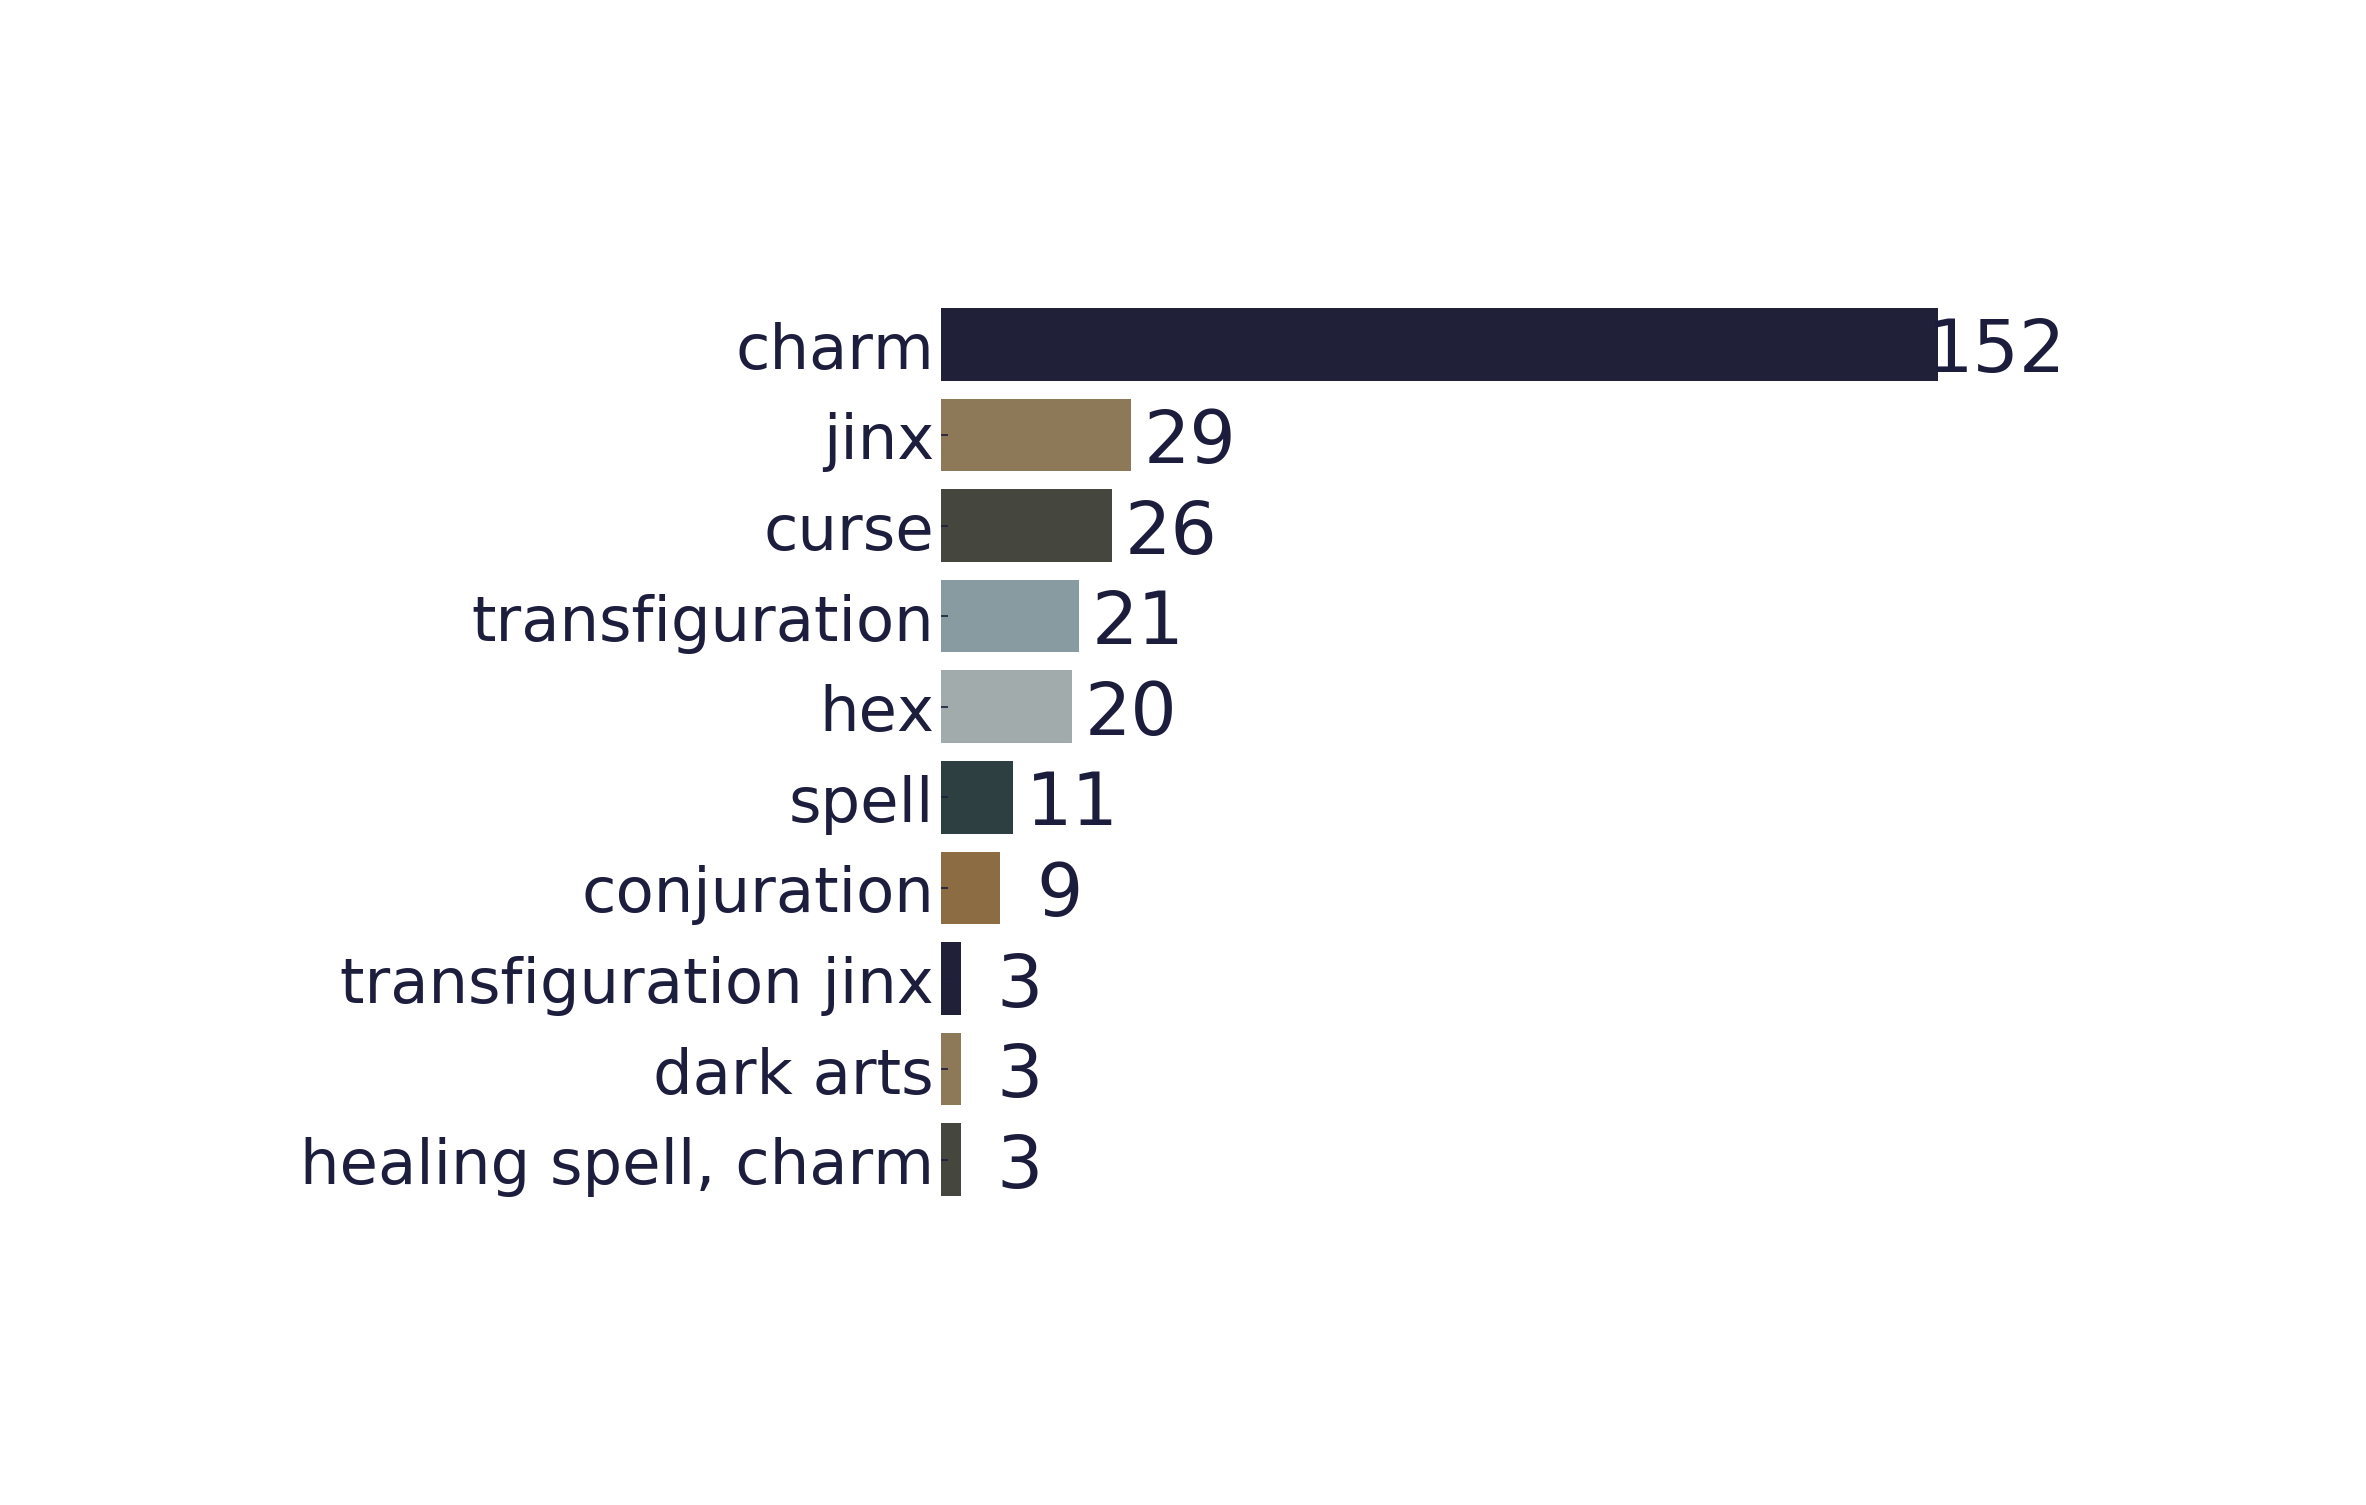

In [7]:
fig = plt.figure(figsize=(9,8))
ax = sns.barplot(x = "Cuenta", y="Type", data=df_s, orient="h", palette=dp)
plt.grid(False)
plt.title("")
ax.set_xlabel("", fontsize=30)
ax.set_ylabel("", fontsize=30)

plt.xticks([])
plt.box(False)


# jugar con estos valores
vertical_offset = 0.3
horizontal_offset = 9

for index, row in df_s.iterrows():
    ax.text(row["Cuenta"] + horizontal_offset,index+vertical_offset, # posicion
            row["Cuenta"], # texto
            color='#1C1C3C', 
            ha="center", 
            size=35)

ax.tick_params(axis='both', which='major', labelsize=30)
plt.savefig('spells.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

In [8]:
df_total = pd.concat([df1,df2,df3], ignore_index=True)

In [55]:
df_total

Character                                           Sentence
0     dumbledore  i should've known that you would be here, prof...
1     mcgonagall                good evening, professor dumbledore.
2     mcgonagall                        are the rumors true, albus?
3     dumbledore                          i'm afraid so, professor.
4     dumbledore                              the good and the bad.
...          ...                                                ...
4920    hermione                             how fast is it, harry?
4921       harry                                             lumos.
4922       harry          i solemnly swear that i am up to no good.
4923       harry                                  mischief managed.
4924       harry                                               nox.

[4925 rows x 2 columns]

In [91]:
word = "voldemort"
w2 = "you know who"
w3 = "he who must not be name"
w4 = "he-who-must-not-be-name"
'''
he who must not be name 
you know who
'''
#df_word = df_total[df_total["Sentence"].str.contains(word) | df_total["Sentence"].str.contains(w2) | df_total["Sentence"].str.contains(w3) | df_total["Sentence"].str.contains(w4)]
df_word = df_total[df_total["Sentence"].str.contains(word)]

df_word_count = df_word.groupby("Character").count().rename(columns={"Sentence":"cuenta"}).reset_index()
df_word_count = df_word_count.sort_values("cuenta", ascending=False).head(10).reset_index(drop="True")
df_word_count

Character  cuenta
0       harry      13
1  dumbledore       5
2  tom riddle       4
3      hagrid       2
4       lupin       2
5    hermione       1
6      sirius       1

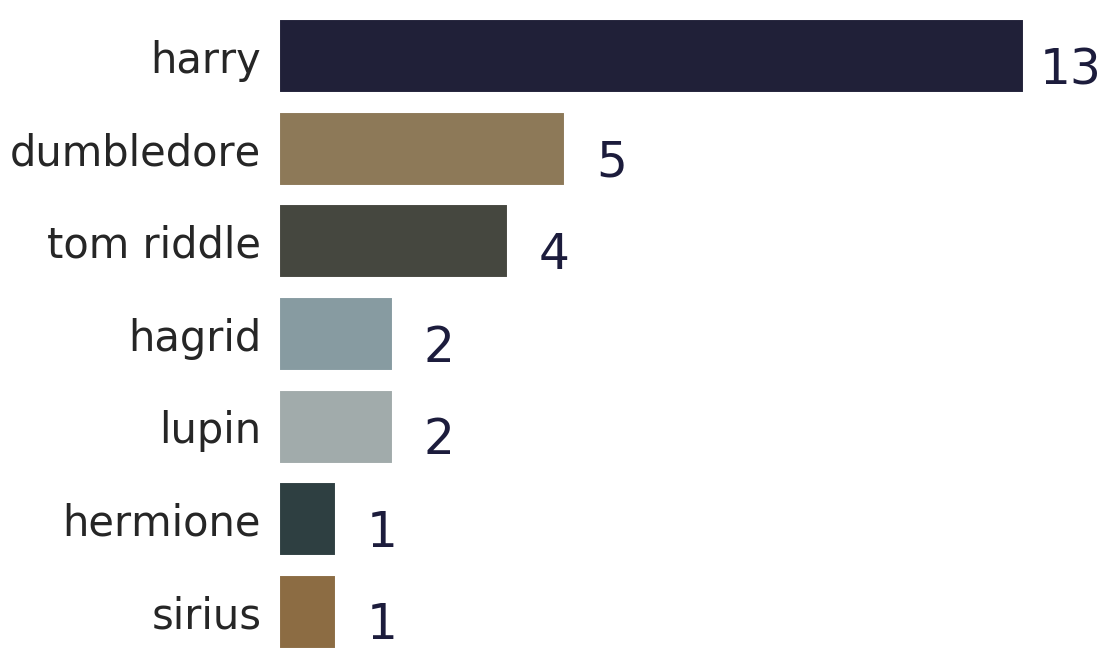

In [92]:
fig = plt.figure(figsize=(9,8))
ax = sns.barplot(x = "cuenta", y="Character", data=df_word_count, orient="h", palette=dp)
plt.grid(False)
plt.title("")
ax.set_xlabel("", fontsize=30)
ax.set_ylabel("", fontsize=30)

plt.xticks([])
plt.box(False)


# jugar con estos valores
vertical_offset = 0.3
horizontal_offset = 0.8

for index, row in df_word_count.iterrows():
    ax.text(row["cuenta"] + horizontal_offset,index+vertical_offset, # posicion
            row["cuenta"], # texto
            color='#1C1C3C', 
            ha="center", 
            size=35)

ax.tick_params(axis='both', which='major', labelsize=30)
plt.savefig(f'{word}.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

In [58]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib

sns.reset_defaults()

datatrooper_palette = [
    "#E6D3AD",
    "#967B4F",
    "#46493D",
    "#839DA5",
    "#9FADAD",
    "#2B4144",
    "#986E37"
]

plt.style.use('fivethirtyeight')
sns.set_palette(datatrooper_palette)
#  #1D1D3D o black
sns.set(rc={'axes.facecolor':'#1D1D3D', 'figure.facecolor':'#1D1D3D'})

sns.set_context("talk")
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR


In [37]:
df = pd.read_csv("../../../data/Characters.csv", encoding= 'unicode_escape', delimiter=';')
df.head(10)

Id                                     Name  Gender  \
0   1                       Harry James Potter    Male   
1   2                    Ronald Bilius Weasley    Male   
2   3                    Hermione Jean Granger  Female   
3   4  Albus Percival Wulfric Brian Dumbledore    Male   
4   5                            Rubeus Hagrid    Male   
5   6                       Neville Longbottom    Male   
6   7                             Fred Weasley    Male   
7   8                           George Weasley    Male   
8   9            Ginevra (Ginny) Molly Weasley  Female   
9  10                              Dean Thomas    Male   

                                                 Job       House  \
0                                            Student  Gryffindor   
1                                            Student  Gryffindor   
2                                            Student  Gryffindor   
3                                         Headmaster  Gryffindor   
4  Keeper of Keys and Grounds | Professor of Care...  Gryffindor   
5                                            Student  Gryffindor   
6                                            Student  Gryffindor   
7                                            Student  Gryffindor   
8                                            Student  Gryffindor   
9                                            Student  Gryffindor   

                                 Wand              Patronus  \
0         11"  Holly  phoenix feather                  Stag   
1          12" Ash unicorn tail hair   Jack Russell terrier   
2  10¾"  vine wood dragon heartstring                 Otter   
3   15" Elder Thestral tail hair core               Phoenix   
4               16"  Oak unknown core                  None   
5             13" Cherry unicorn hair         Non-corporeal   
6                             Unknown               Unknown   
7                             Unknown               Unknown   
8                             Unknown                 Horse   
9                             Unknown               Unknown   

                 Species             Blood status              Hair colour  \
0                  Human               Half-blood                    Black   
1                  Human               Pure-blood                      Red   
2                  Human              Muggle-born                    Brown   
3                  Human               Half-blood  Silver| formerly auburn   
4  Half-Human/Half-Giant  Part-Human (Half-giant)                    Black   
5                  Human               Pure-blood                    Blond   
6                  Human               Pure-blood                      Red   
7                  Human               Pure-blood                      Red   
8                  Human               Pure-blood                      Red   
9                  Human              Muggle-born                    Black   

     Eye colour                                            Loyalty  \
0  Bright green  Albus Dumbledore | Dumbledore's Army | Order o...   
1          Blue  Dumbledore's Army | Order of the Phoenix | Hog...   
2         Brown  Dumbledore's Army | Order of the Phoenix | Hog...   
3          Blue  Dumbledore's Army | Order of the Phoenix | Hog...   
4         Black  Albus Dumbledore | Order of the Phoenix | Hogw...   
5           NaN  Dumbledore's Army | Order of the Phoenix | Hog...   
6         Brown  Dumbledore's Army | Order of the Phoenix | Hog...   
7         Brown  Dumbledore's Army | Order of the Phoenix | Hog...   
8  Bright brown  Dumbledore's Army | Order of the Phoenix | Hog...   
9         Brown  Dumbledore's Army | Hogwarts School of Witchcr...   

                                              Skills  \
0  Parseltongue| Defence Against the Dark Arts | ...   
1               Wizard chess | Quidditch goalkeeping   
2                                  Almost everything   
3  Considered by many to be one of the most power...   
4  Resistan

In [80]:
df["Species"] = df["Species"].str.strip()
df_s = pd.DataFrame(df.groupby('Species')['Wand'].count()).reset_index().sort_values('Wand', ascending = False)
df_s = df_s.rename(columns = {'Wand':'cuenta'}).reset_index(drop=True)
df_s = df_s.head(10)
df_s.head(10)

Species  cuenta
0                    Human     119
1                    Ghost       6
2    Half-Human/Half-Giant       2
3                 Werewolf       2
4   Human(goblin ancestry)       1
5   Human (Metamorphmagus)       1
6  Human (Werewolf traits)       1
7                  Centaur       0
8                House elf       0

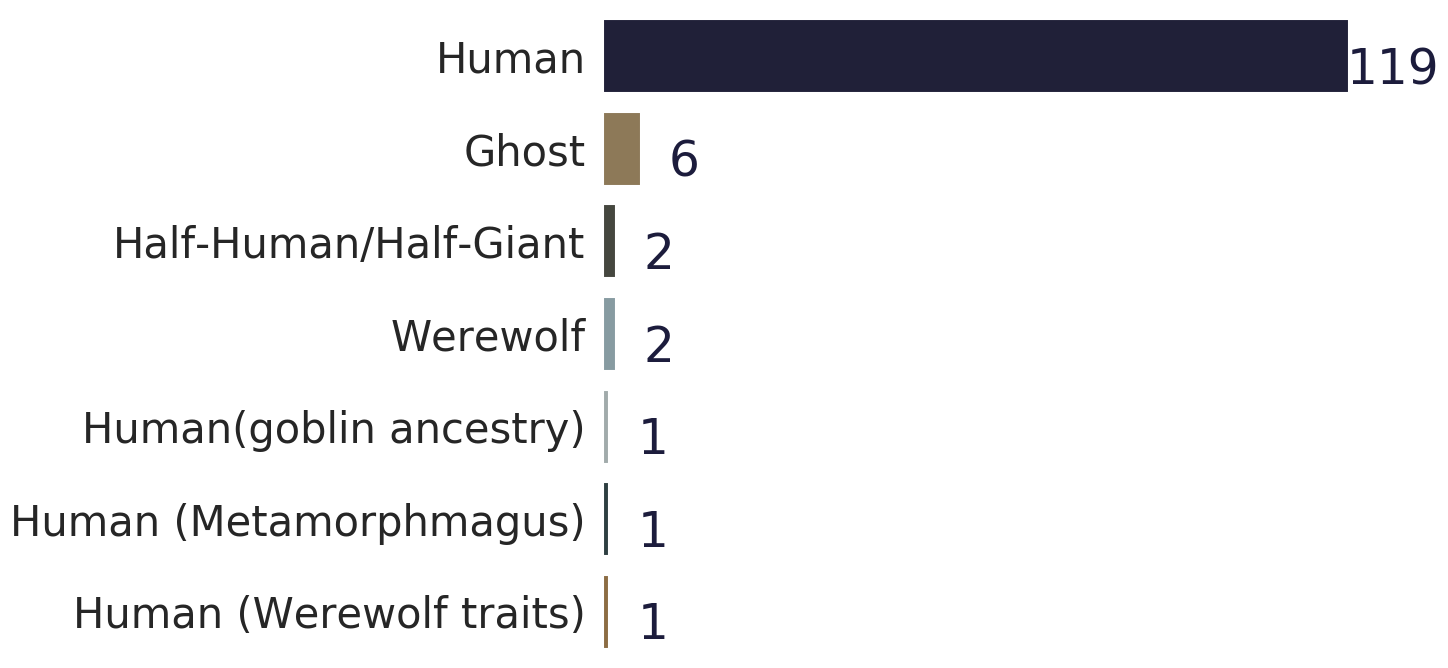

In [93]:
fig = plt.figure(figsize=(9,8))
ax = sns.barplot(x = "cuenta", y="Species", data=df_s.head(7), orient="h", palette=dp)
plt.grid(False)
plt.title("")
ax.set_xlabel("", fontsize=30)
ax.set_ylabel("", fontsize=30)

plt.xticks([])
plt.box(False)


# jugar con estos valores
vertical_offset = 0.3
horizontal_offset = 7

for index, row in df_s.head(7).iterrows():
    ax.text(row["cuenta"] + horizontal_offset,index+vertical_offset, # posicion
            row["cuenta"], # texto
            color='#1C1C3C', 
            ha="center", 
            size=35)

ax.tick_params(axis='both', which='major', labelsize=30)
plt.savefig('Species.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

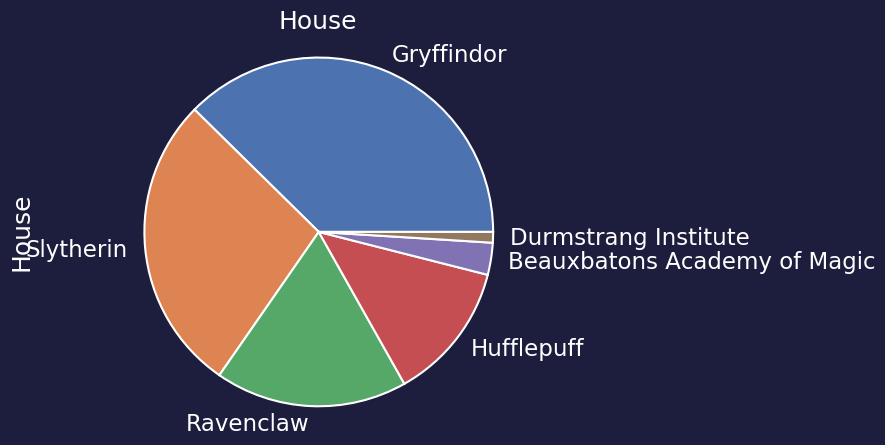

In [30]:
df.House.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('House')
plt.show()

In [61]:
with open('../../../data/1SorcerersStone.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

text= TextBlob(data)
my_list=text.tags

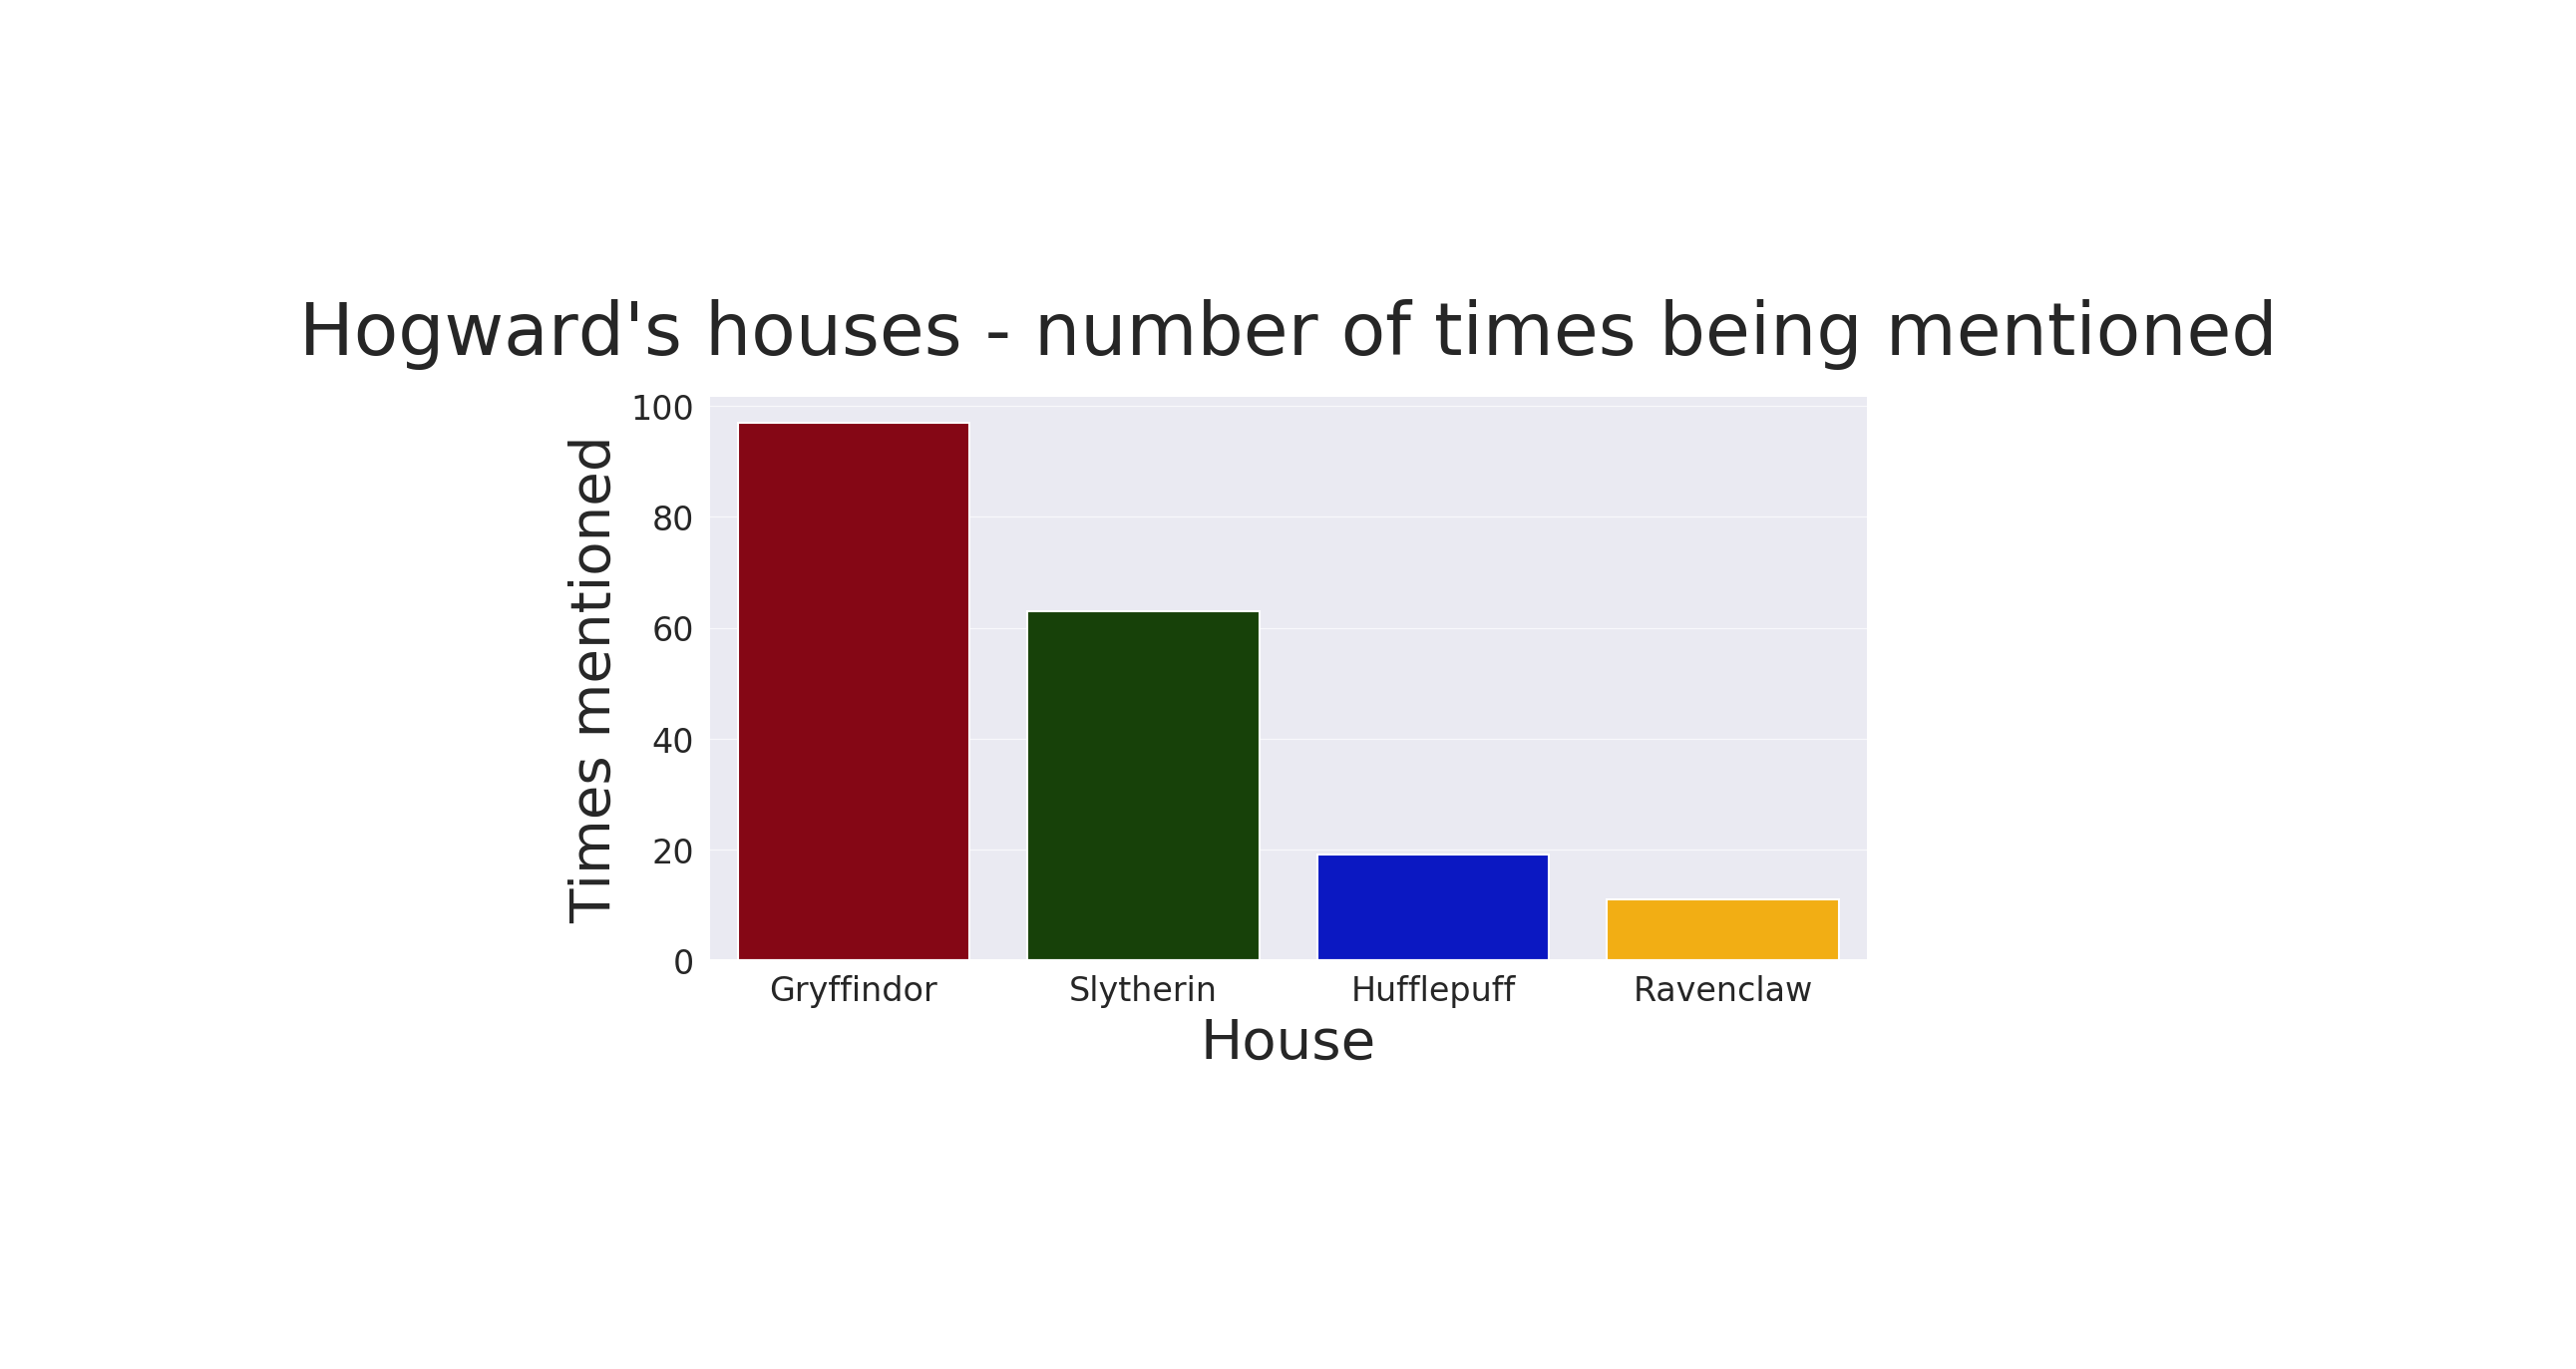

In [57]:
Slytherin = data.count("Slytherin")
Gryffindor = data.count("Gryffindor")
Hufflepuff = data.count("Hufflepuff")
Ravenclaw = data.count("Ravenclaw")
house_list = [['Gryffindor', Gryffindor], ['Slytherin', Slytherin], ['Hufflepuff', Hufflepuff], ['Ravenclaw', Ravenclaw]]
df_house=pd.DataFrame(house_list, columns=['House', 'Times mentioned'])
colors = ["crimson", "forrest green", "true blue", "amber"]
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
with sns.xkcd_palette(colors):
    sns.barplot(x="House", y="Times mentioned", saturation=0.9, data=df_house).set_title("Hogward's houses - number of times being mentioned")

In [59]:
def word_analysis(word_type, how_much):
    dict = {'NN': 'nouns', 'VB': 'verbs', 'JJ': 'adjectives', 'WP': 'pronouns', 'RB': 'adverbs', 'NNP': 'proper nouns'}
    filtered = [row for row in my_list if str(word_type) in row[1]]
    print("filtered for " + dict.get(word_type))
    df = pd.DataFrame(filtered)
    df = df[df[1]==word_type]
    df.columns = ["Word", "Occurences"]
        
    x=df.groupby('Word').count().reset_index()
    y=x.sort_values(by=['Occurences'], ascending=False)
    top10=y.nlargest(how_much, 'Occurences')
    sns.set_style("darkgrid")
    plt.figure(figsize=(10, 5))
    sns.barplot(x="Word", y="Occurences", palette="ch:2.5,-.2,dark=.2_r", saturation=0.9, data=top10).set_title("Harry Potter and the philosophers' stone - most frequently used "+ dict.get(word_type))

filtered for proper nouns


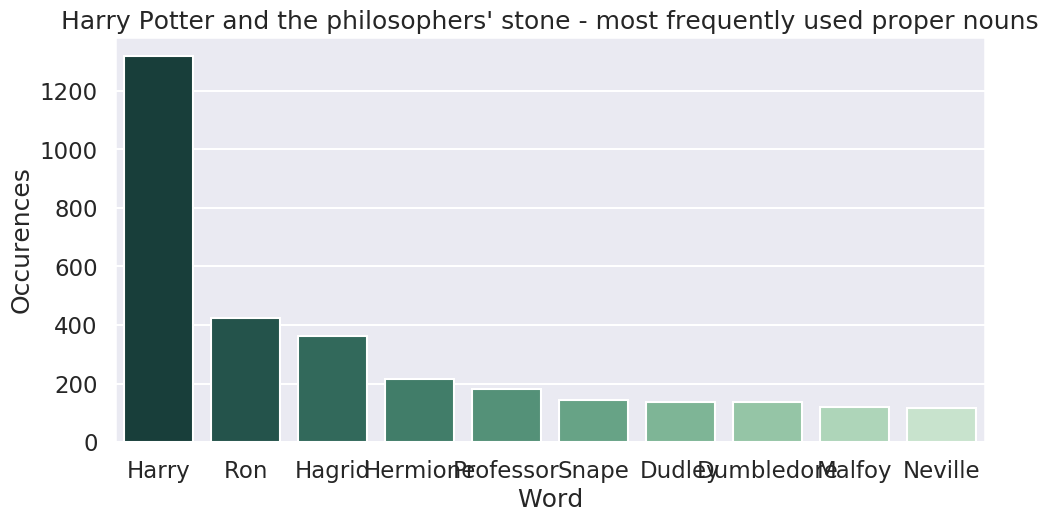

In [62]:
word_analysis(word_type='NNP', how_much=10)

## Notebook 2

In [6]:
import numpy as np
import pandas as pd
import string
import re
import nltk
nltk.download("stopwords")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to /home/tomas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
file = open('../../../data/1SorcerersStone.txt')
text = file.read()
re.findall('Page\s.\s\d*\s.*Rowling',text)[:2]

[]

In [8]:
text = re.sub('Page\s.\s\d*\s.*Rowling','',text)
text = re.sub('\n','',text)

In [9]:
# using regex tokenizer
from nltk.tokenize import RegexpTokenizer

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

text = "".join([word for word in text if word not in string.punctuation])
tokenizer=RegexpTokenizer("['\w]+")
tokens = tokenizer.tokenize(text)
words = [word.lower() for word in tokens if word.lower() not in stop_words]

In [10]:
#Printing vocabulary size
vocabulary = set(words)
print('The vocabulary size is: ',len(vocabulary))

The vocabulary size is:  5897


In [11]:
print('The number of words that have been removed is {} which is {:.2f}% of total words'.format
      (len(tokens)-len(words),len(words)/len(tokens)*100))

The number of words that have been removed is 35135 which is 54.72% of total words


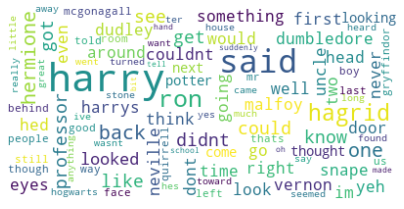

In [12]:
from nltk.util import ngrams
from collections import Counter
from wordcloud import WordCloud,ImageColorGenerator

unigrams = list(ngrams(words, 1))
freq = Counter(unigrams)
topN= freq.most_common(100)

wordscount = {w[0]:f for w, f in topN}   
wordcloud = WordCloud(max_font_size=40,background_color="white")
wordcloud.fit_words(wordscount)
plt.figure(figsize=(7,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

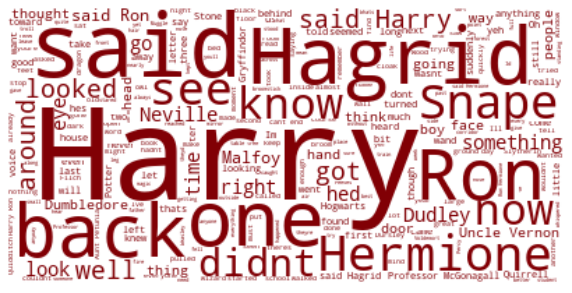

In [15]:
import PIL.Image
from IPython.display import Image

mask = np.array(PIL.Image.open("../../../data/casas_hp.jpg"))
wordcloud = WordCloud(background_color="white", max_words=400).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
personajes = ['harry',
              'ron',
              'hermione',
              'dumbledore',
              'snape',
              'neville',
              'bellatrix',
              'voldemort',
              'luna',
              'ginny'
             ]

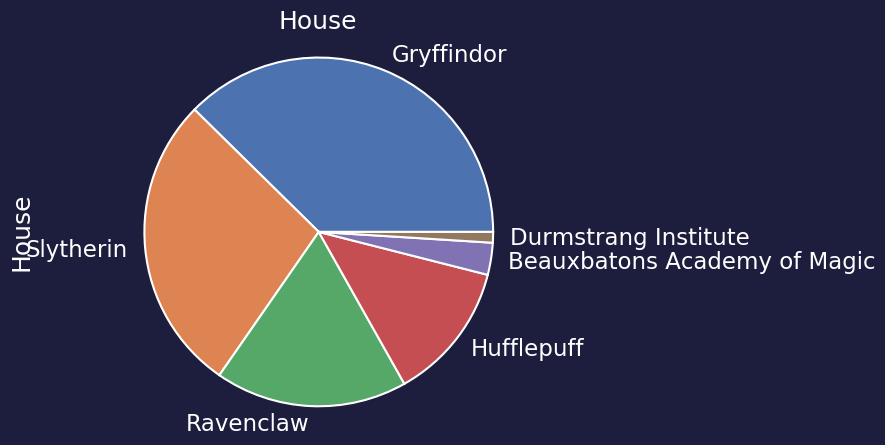

In [4]:
df.House.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('House')
plt.show()

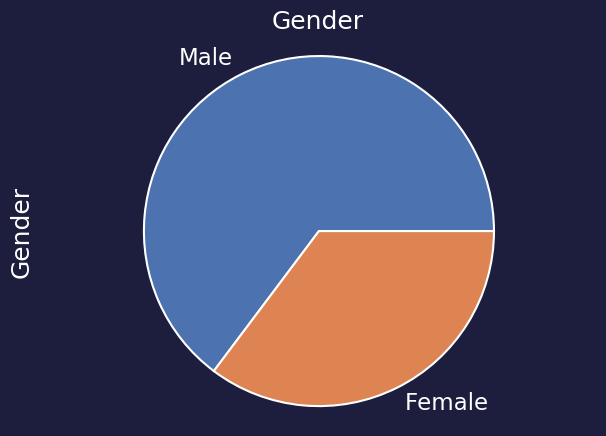

In [13]:
df.Gender.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Gender')
plt.show()

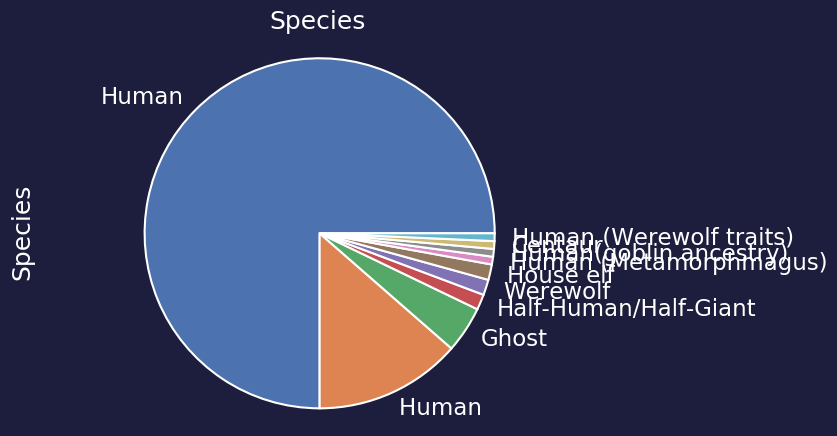

In [14]:
df.Species.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Species')
plt.show()

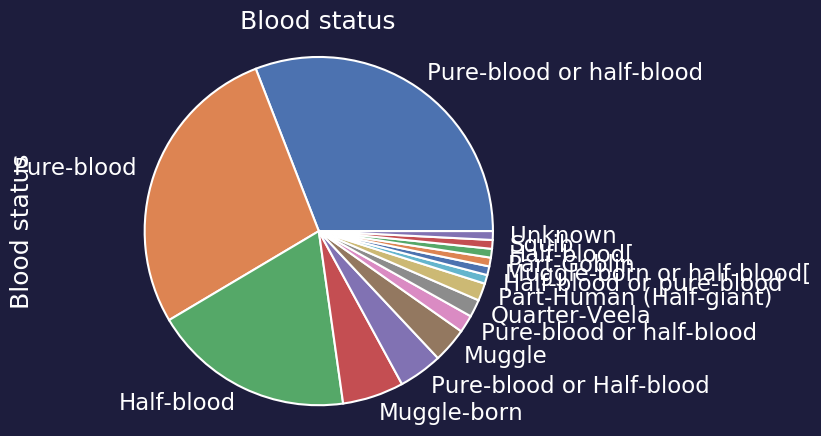

In [18]:
df['Blood status'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Blood status')
plt.show()

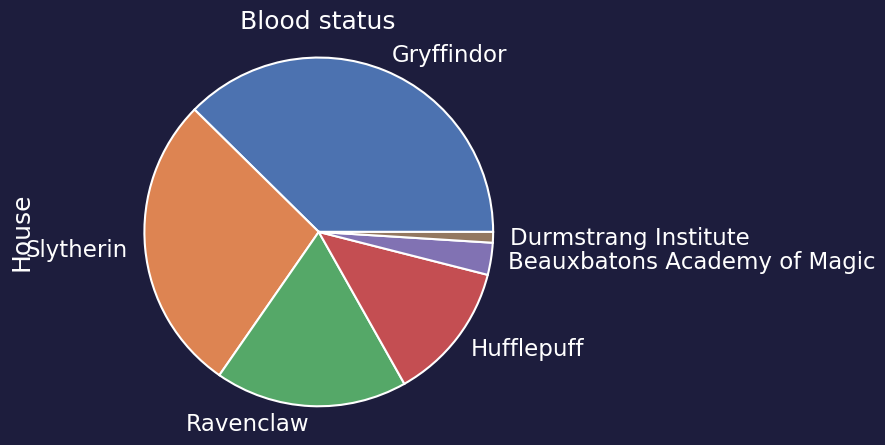

In [19]:
df['House'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Blood status')
plt.show()

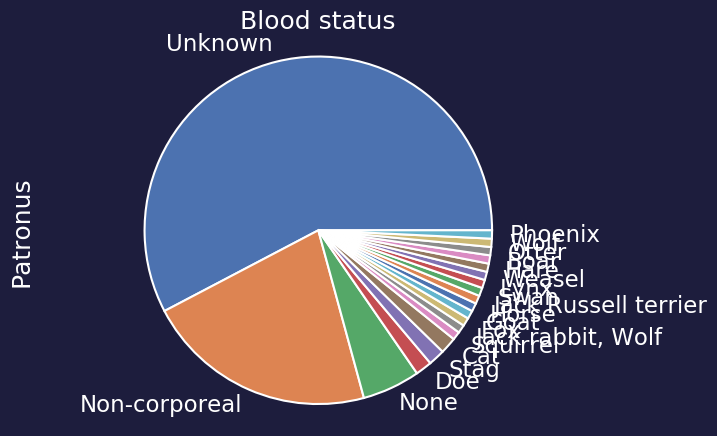

In [20]:
df.Patronus.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Blood status')
plt.show()

In [21]:
plt.style.use('https://raw.githubusercontent.com/datatrooper/instatrooper/master/styles/whitetrooper.mplstyle')
fig = plt.figure(figsize=(5,10))


#sns.set(font_scale = 0.8)


ax = sns.barplot(y="Year", x='muertes', orient="h", data = df_c, palette=datatrooper_palette)
#plt.xlim(8, 8.6)
ax.set_title("Muertes por animales venenosos", pad=20, fontsize=35)
ax.set_xlabel("Muertes por cada 100.000 habitantes", fontsize=27)
ax.set_ylabel("Año", fontsize=27)

plt.show()
fig.savefig('venenosos.png', transparent="True", facecolor=fig.get_facecolor(),pad_inches=2, bbox_inches="tight", dpi=100)

NameError: name 'df_c' is not defined

In [3]:
df_2000 = df.loc[df['Year']==2000]
df_2005 = df.loc[df['Year']==2005]
df_2010 = df.loc[df['Year']==2010]
df_2015 = df.loc[df['Year']==2015]

In [4]:
df = df_2000
data=dict(
    type = 'choropleth',
    locations = df['Code'],
    z = df['porcentaje'],
    text = df['Entity'],
    colorscale = 'YlOrRd',
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = '%',
)

layout = dict(geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ))

fig = go.Figure(data = [data], layout = layout)

fig.update_layout(
    title="Porcentaje arboles en 2000",
    font=dict(
        family="Courier New, monospace",
        size=28,
        color="#7f7f7f"
    )
)
plot(fig,filename='../../../outputs/arboles_2000.html')
iplot(fig)

In [5]:
df = df_2005
data=dict(
    type = 'choropleth',
    locations = df['Code'],
    z = df['porcentaje'],
    text = df['Entity'],
    colorscale = 'YlOrRd',
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = '%',
)

layout = dict(geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ))

fig = go.Figure(data = [data], layout = layout)

fig.update_layout(
    title="Porcentaje arboles en 2005",
    font=dict(
        family="Courier New, monospace",
        size=28,
        color="#7f7f7f"
    )
)
plot(fig,filename='../../../outputs/arboles_2005.html')
iplot(fig)

In [6]:
df = df_2010
data=dict(
    type = 'choropleth',
    locations = df['Code'],
    z = df['porcentaje'],
    text = df['Entity'],
    colorscale = 'YlOrRd',
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = '%',
)

layout = dict(geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ))

fig = go.Figure(data = [data], layout = layout)

fig.update_layout(
    title="Porcentaje arboles en 2010",
    font=dict(
        family="Courier New, monospace",
        size=28,
        color="#7f7f7f"
    )
)
plot(fig,filename='../../../outputs/arboles_2010.html')
iplot(fig)

In [7]:
df = df_2015
data=dict(
    type = 'choropleth',
    locations = df['Code'],
    z = df['porcentaje'],
    text = df['Entity'],
    colorscale = 'YlOrRd',
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = '%',
)

layout = dict(geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ))

fig = go.Figure(data = [data], layout = layout)

fig.update_layout(
    title="Porcentaje arboles en 2015",
    font=dict(
        family="Courier New, monospace",
        size=28,
        color="#7f7f7f"
    )
)
plot(fig,filename='../../../outputs/arboles_2015.html')
iplot(fig)